## Group Project
#### Group 1: Eric Chen, Eli Guo, Johanne Xiong, Jijin Xu, Shuhan Zhang, Longxiang Zheng

### Import Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions

### Read Data

In [2]:
left_df = pd.read_csv('left_dataset.csv')
right_df = pd.read_csv('right_dataset.csv')

In [3]:
left_df.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123.0,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054.0,"Brewpubs, Breweries, Food"
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144.0,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


In [4]:
right_df.head()

,business_id,name,address,city,state,zip_code,size
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762-4726,11.0
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626-3030,12.0
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614,8.0


In [5]:
left_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94585 entries, 0 to 94584
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity_id    94585 non-null  int64  
 1   name         94585 non-null  object 
 2   address      91787 non-null  object 
 3   city         94585 non-null  object 
 4   state        94585 non-null  object 
 5   postal_code  94548 non-null  float64
 6   categories   94523 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.1+ MB


In [6]:
right_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91791 entries, 0 to 91790
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  91791 non-null  int64  
 1   name         91791 non-null  object 
 2   address      91791 non-null  object 
 3   city         91791 non-null  object 
 4   state        91791 non-null  object 
 5   zip_code     91791 non-null  object 
 6   size         91791 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.9+ MB


In [7]:
left_df.columns

Index(['entity_id', 'name', 'address', 'city', 'state', 'postal_code',
       'categories'],
      dtype='object')

In [8]:
right_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'zip_code', 'size'], dtype='object')

### Data Visualization

#### Top 10 categories in major cities of the left dataset

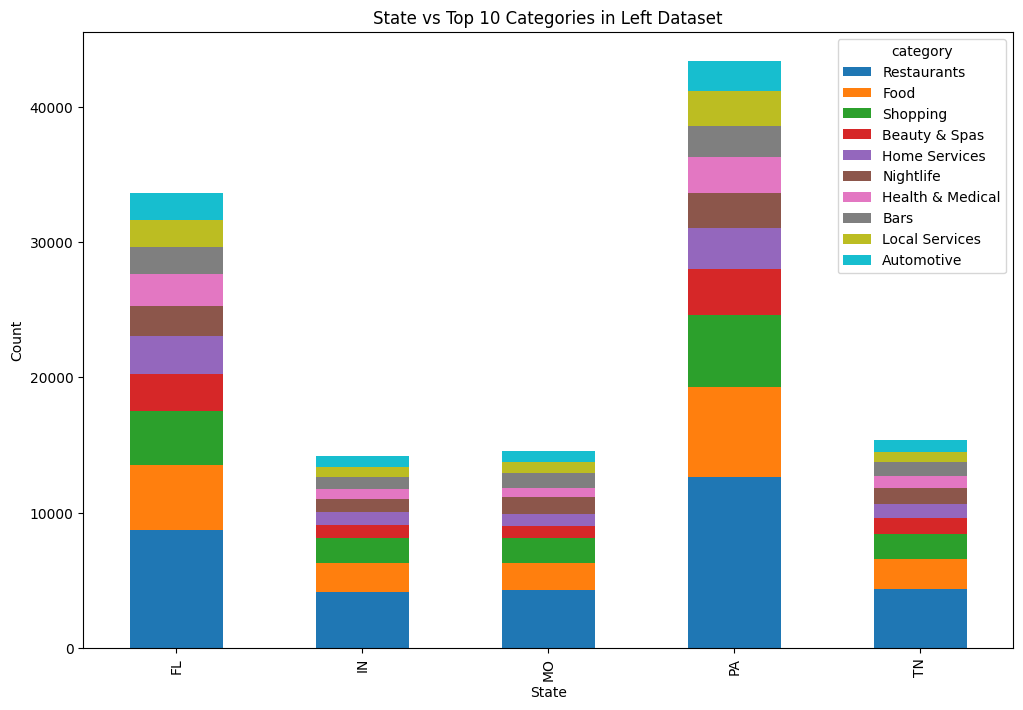

In [9]:
# Split categories column
categories = left_df['categories'].str.split(', ', expand=True)
categories['state'] = left_df['state']

# Melt categories DataFrame and drop unnecessary columns
categories_melted = categories.melt(id_vars='state', value_name='category')
categories_melted.drop(columns='variable', inplace=True)
categories_melted.dropna(subset=['category'], inplace=True)

# Group and count occurrences of each category in each state
state_category_counts = categories_melted.groupby(['state', 'category']).size().unstack()

# Calculate top 10 categories and filter the counts DataFrame
top_categories = state_category_counts.sum().sort_values(ascending=False)[:10].index
state_category_counts = state_category_counts.filter(top_categories, axis=1)

# Create a stacked bar plot
state_category_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('State vs Top 10 Categories in Left Dataset')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

#### Number of entities in top 10 cities of the left dataset

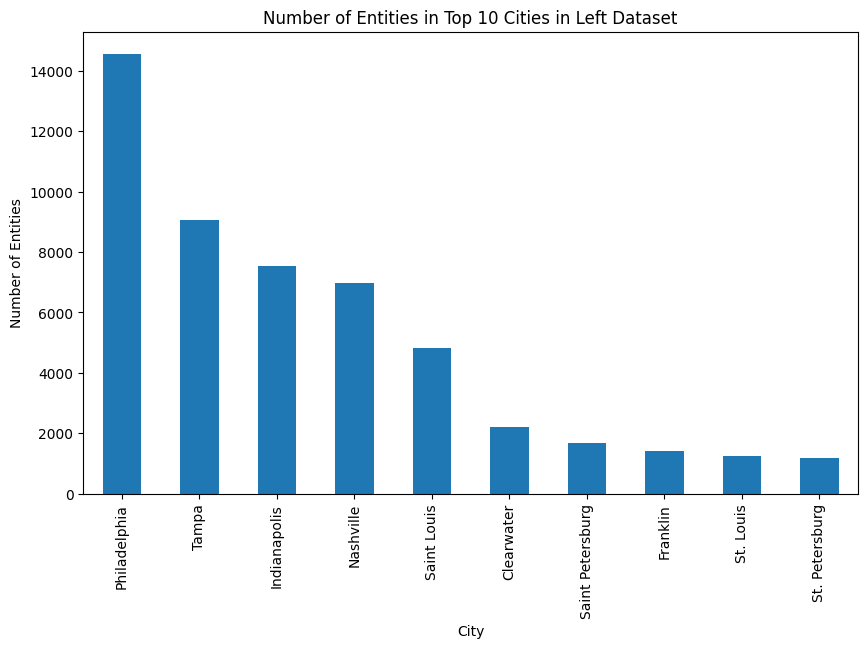

In [10]:
# Count number of entities in each city in the left dataset
city_counts = left_df.groupby('city').count()['entity_id']

# Get top 10 cities with highest counts
top_cities = city_counts.nlargest(10).index.tolist()

# Create DataFrame with city and entity names for top 10 cities
top_entities = left_df[left_df['city'].isin(top_cities)][['city', 'name']]

# Create and customize bar chart for top 10 cities
fig, ax = plt.subplots(figsize=(10, 6))
city_counts[top_cities].plot(kind='bar', ax=ax)
ax.set_title('Number of Entities in Top 10 Cities in Left Dataset')
ax.set_xlabel('City')
ax.set_ylabel('Number of Entities')

# Display bar chart
plt.show()

#### Average business size in major cities of the right dataset

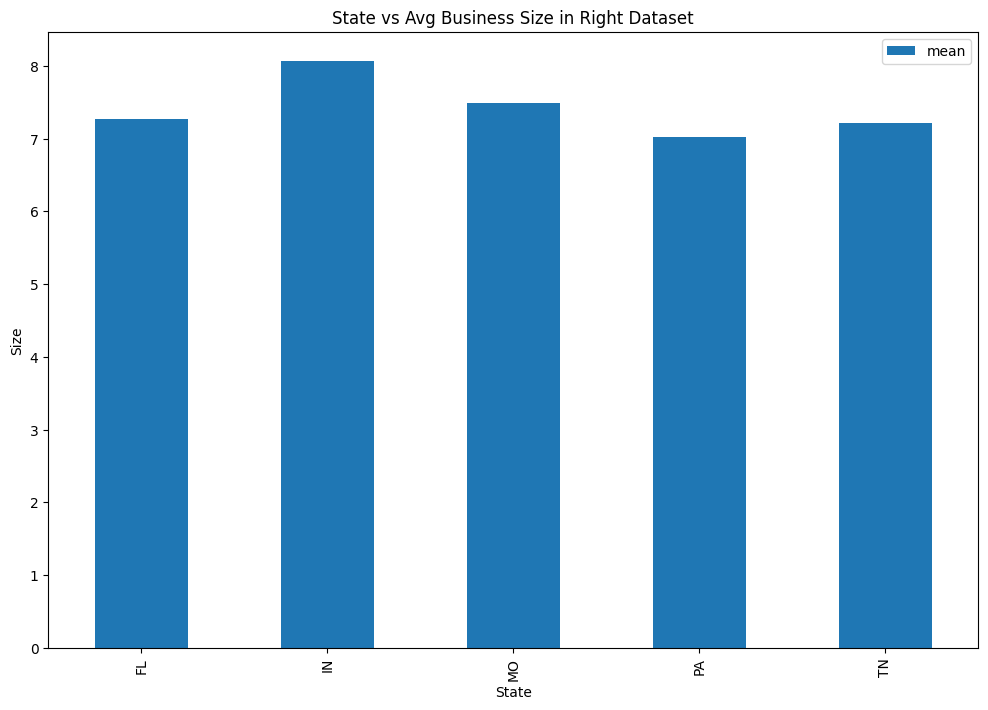

In [11]:
# Group by state and calculate average business size for each state
state_size = right_df.groupby('state')['size'].agg(['mean'])

# Create bar plot of average business size per state
state_size.plot(kind='bar', figsize=(12, 8))

# Set plot title and axis labels
plt.title('State vs Avg Business Size in Right Dataset')
plt.xlabel('State')
plt.ylabel('Size')

# Display plot
plt.show()

#### Top 10 cities in both datasets

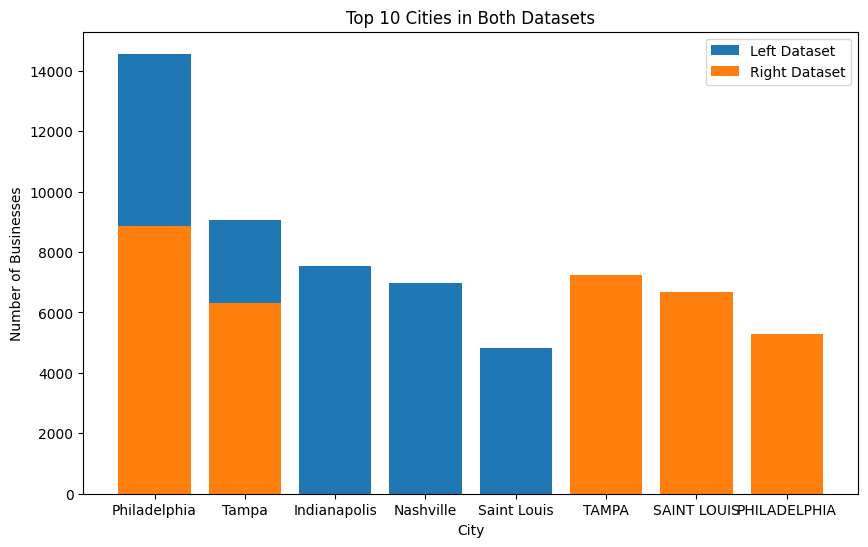

In [12]:
# Get top 5 cities for both datasets
left_cities = left_df['city'].value_counts().head(5)
right_cities = right_df['city'].value_counts().head(5)

# Create a new plot with custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot top 5 cities for left and right datasets as bar charts
ax.bar(left_cities.index, left_cities.values, label='Left Dataset')
ax.bar(right_cities.index, right_cities.values, label='Right Dataset')

# Set labels for axes and title
ax.set_xlabel('City')
ax.set_ylabel('Number of Businesses')
ax.set_title('Top 10 Cities in Both Datasets')

# Add legend and display plot
ax.legend()
plt.show()

### Data Preparation

In [13]:
# Keep only id, name, address, and zip code columns in the datasets
left_df = left_df[['entity_id', 'name', 'address', 'postal_code']]
right_df = right_df[['business_id', 'name', 'address', 'zip_code']]

#### Merge company name, address, and zip code for fuzzy matching

In [14]:
# Ensure name and address columns in both datasets are strings
left_df['name'] = left_df['name'].astype(str)
left_df['address'] = left_df['address'].astype(str)

right_df['name'] = right_df['name'].astype(str)
right_df['address'] = right_df['address'].astype(str)

In [15]:
# Replace missing values in the postal_code column of left database with 0
left_df['postal_code'] = left_df['postal_code'].fillna(0)

# Convert the postal_code column data type to integer,
# then to string to remove any decimal places
left_df['postal_code'] = left_df['postal_code'].astype(int).astype(str)

# Replace any '0' values in the postal_code column with an empty string
left_df['postal_code'] = left_df['postal_code'].replace('0', '')

# Convert the zip_code column data type to string in right database
right_df['zip_code'] = right_df['zip_code'].astype(str)

In [16]:
# Combine name, address, and postal/zip code columns as a new column info
left_df['info'] = left_df['name'] + ' ' + left_df['address'] + ' ' + left_df['postal_code']
right_df['info'] = right_df['name'] + ' ' + right_df['address'] + ' ' + right_df['zip_code']

# Drop original columns
left_df = left_df.drop(columns=['name', 'address', 'postal_code'])
right_df = right_df.drop(columns=['name', 'address', 'zip_code'])

In [17]:
left_df.loc[0, 'info']

'The UPS Store 87 Grasso Plaza Shopping Center 63123'

#### Rename id columns and add a prefix ('L', 'R') to id values

In [18]:
# Rename id columns in both datasets
left_df = left_df.rename(columns={'entity_id': 'id'})
right_df = right_df.rename(columns={'business_id': 'id'})

In [19]:
# Add a prefix ('L', 'R') to id values
left_df['id'] = left_df['id'].apply(lambda x: 'L' + str(x))
right_df['id'] = right_df['id'].apply(lambda x: 'R' + str(x))

#### Concatenate left and right datasets

In [20]:
df = pd.concat([left_df, right_df])
df.shape

(186376, 2)

In [21]:
df = df.reset_index(drop=True) # reset index

In [22]:
df.tail()

,id,info
186371,R91787,DEH TRANSPORT LLC 737 E Statue Ct 37067-5637
186372,R91788,TM INC. LLC 4911 Georgia Ave 37209-2135
186373,R91789,"PASSION TRANSPORTATION SERVICES, LLC 2005 QUAI..."
186374,R91790,ROSIE CLEANING SERVICE/COMMERCIAL 705 N 9TH ST...
186375,R91791,THE AQUADUCKS LLC 128 Gordon Ter 37207-4534


#### Apply the text preparation function to the dataset

In [23]:
df['info'] = df['info'].apply(lambda x: functions.text_prepare(x))

### Fuzzy Matching

#### Transform text to vectors with TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, token_pattern='(\S+)')

# Create a TF-IDF matrix for the info column
tf_idf_matrix = tfidf_vectorizer.fit_transform(df['info'])

# Check the vectors
print(tf_idf_matrix[0])

  (0, 46553)	0.279900067332226
  (0, 42290)	0.3233610918840523
  (0, 15226)	0.36726801078894605
  (0, 51319)	0.2605078738018117
  (0, 50234)	0.2605078738018117
  (0, 12914)	0.2420376523395954
  (0, 21629)	0.15573980122328396
  (0, 46552)	0.25000524002294416
  (0, 42273)	0.2203304311023969
  (0, 28692)	0.3422287437786501
  (0, 15225)	0.32686102392659044
  (0, 48602)	0.20684483861364997
  (0, 51317)	0.25887918337300836
  (0, 49911)	0.1372296235116693


#### Compute cosine similarity

In [25]:
import time
start_time = time.time()

# adjust lower bound: 0.8
# keep top 100000 similar results
matches = functions.awesome_cossim_top(tf_idf_matrix, tf_idf_matrix.transpose(), 100000, 0.8)

end_time = time.time()
t = end_time - start_time
print("finished in:", t, "seconds")

finished in: 42.55988693237305 seconds


#### Create a match table to show the similarity scores

In [26]:
# Initialize match table as an empty DataFrame
matches_df = pd.DataFrame()

# Populate match table
matches_df = functions.get_matches_df(matches, df['id'], top=100000)

# Select only matches from different datasets
matches_df = matches_df[matches_df['left_dataset'].str.startswith('L') & matches_df['right_dataset'].str.startswith('R')] 

# Check random samples from the match table
matches_df.sample(10)

,left_dataset,right_dataset,confidence_score
80026,L64337,R81164,0.814611
31518,L25188,R67847,0.880651
17364,L13994,R75526,0.876206
70842,L56837,R7796,0.823548
28566,L22813,R90327,0.932988
2676,L2196,R7796,0.848559
58688,L47088,R44158,0.806891
59860,L48036,R7845,0.852445
26501,L21190,R12310,0.818116
91652,L73468,R51620,0.922159


In [27]:
# Remove prefix
matches_df['left_dataset'] = matches_df['left_dataset'].apply(lambda x: x.replace('L', ''))
matches_df['right_dataset'] = matches_df['right_dataset'].apply(lambda x: x.replace('R', ''))

# Reset index
matches_df = matches_df.reset_index(drop=True)

# Check random samples from the match table
matches_df.sample(10)

,left_dataset,right_dataset,confidence_score
1415,30973,7101,0.829984
3422,78099,24358,0.815696
2177,49309,6473,0.885619
940,20925,21577,0.913664
432,9648,24397,0.850772
952,21130,2413,0.812412
673,14771,13614,0.846505
2594,59081,40904,0.828667
1132,24414,68228,0.829399
2123,48036,15285,0.852445


In [28]:
# Check the number of matches
print(matches_df.shape[0])

3508


In [29]:
matches_df.to_csv('score.csv', index=False)